In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [8]:
import numpy as np
import pandas as pd
import h5py
import python_utils_jjm as utils_jjm
from tqdm import tqdm
from scipy import stats
from scipy import signal 
from importlib import reload
from matplotlib import pyplot as plt
import itertools
import miniscope_analysis as ma

In [4]:
dir_path = '/Volumes/My_Passport/cnmfe_analysis_files/OpenFieldAnalysis/'

In [5]:
session = pd.read_hdf(dir_path+'GRIN026_aligned_to_behavior.h5')

In [12]:
#get time where velocity crosses threshold 

sample_points = ma.count_events_in_array(session['behavior']['velocity_z_score'].values, 30, 0.1, threshold=3, up=True)[1]

# sort based on velocity before movement  

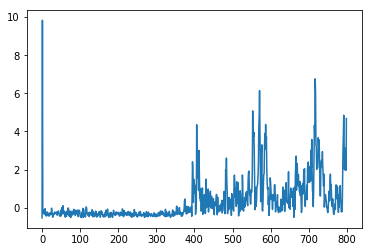

In [18]:
plt.plot(session['behavior']['velocity_z_score'][0:800])

In [ ]:
plt.plot(session['behavior']['velocity_z_score'][0:800])

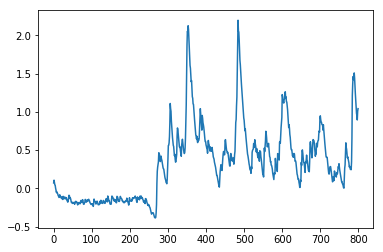

In [25]:
plt.plot(session['C_z_scored'].mean(axis=1)[0:800])